In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Import dataframe
df = pd.read_csv("all_data.csv")

# Fix column names
df.rename(columns = {
    "Country":"country",
    "Year":"year",
    "Life expectancy at birth (years)":"life_exp", 
    "GDP":"gdp"},inplace=True)

# Inspect the data
df.head(25)


,country,year,life_exp,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


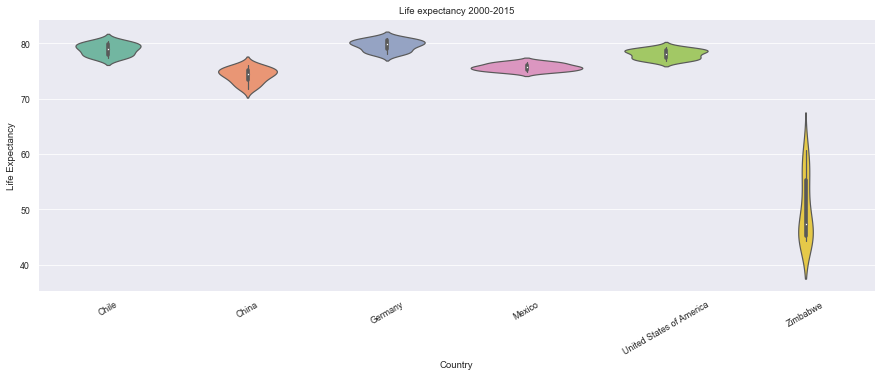

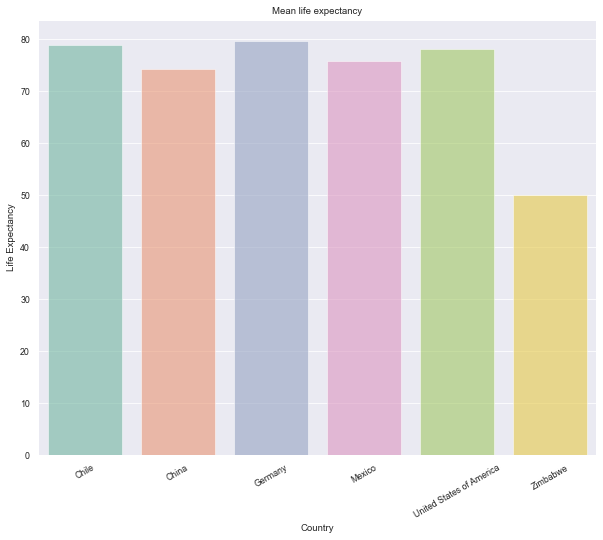

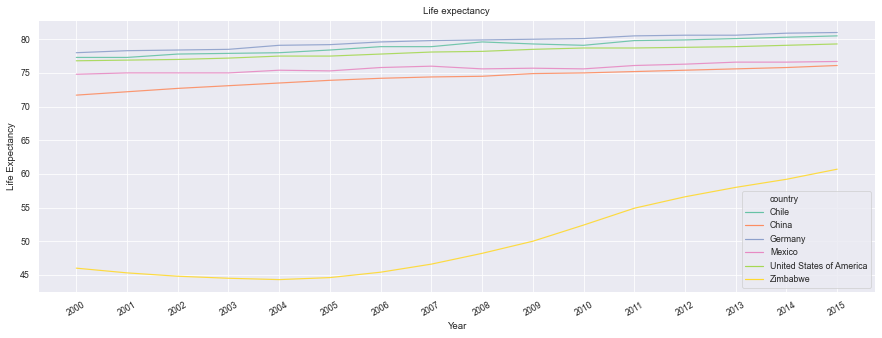

In [46]:
# Mean by country
mean_by_country = df.groupby("country").life_exp.mean().reset_index()
std_by_country = df.groupby("country").life_exp.std().reset_index()

# Some descriptive plots

# Violinplots for life expectancy

plt.figure(figsize=(15,5))
plt.title("Life expectancy 2000-2015")
sns.set_context("paper")
sns.set_palette("Set2")
sns.set_style("darkgrid")
ax=sns.violinplot(data=df, x='country',y='life_exp')
plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.savefig('plots/violin_life_exp_2000_2015.png')
plt.show()

# Barplot for mean per country
plt.figure(figsize=(10,8))
plt.title("Mean life expectancy")
sns.set_context("paper")
sns.set_palette("Set2")
sns.set_style("darkgrid")
ax=sns.barplot(data=mean_by_country, x='country',y='life_exp', alpha=0.6)
plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.savefig('plots/bar_mean_life_exp_2000_2015.png')
plt.show()

# Line plot
plt.figure(figsize=(15,5))
plt.title("Life expectancy")
sns.set_context("paper")
sns.set_palette("Set2")
sns.set_style("darkgrid")
ax=sns.lineplot(data=df, x='year',y='life_exp', hue="country",alpha=0.9)
ax.set_xticks(range(2000,2016,1))
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.savefig('plots/line_life_exp_2000_2015.png')
plt.show()

In [83]:
# Function to get regression for life_exp/GDP for a country
def reg_by_country(df,country):
    selection = df[(df["country"]==country)]
    sns.set_context("paper")
    sns.set_palette("Set2")
    sns.set_style("darkgrid")
    sns.lmplot(data=selection, x='life_exp',y='gdp', height=5, aspect=1)
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP")
    plt.title("Life Expectancy vs GDP for "+country)
    plt.savefig('plots/regression_life_exp_gdp_'+country+'.png')
    plt.show()


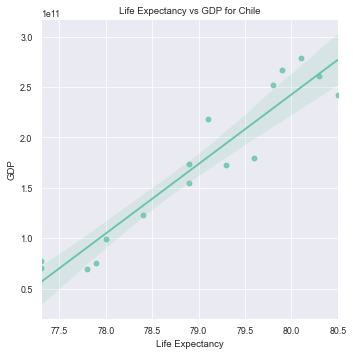

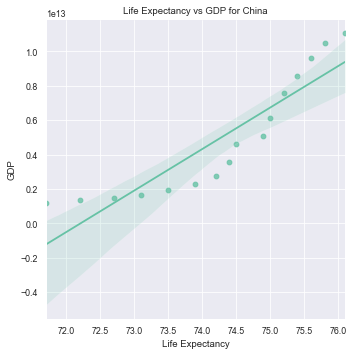

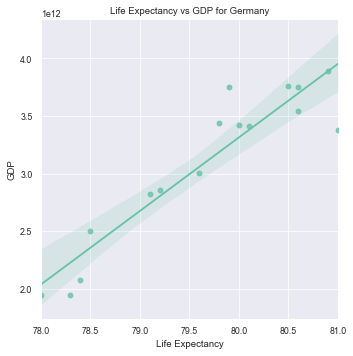

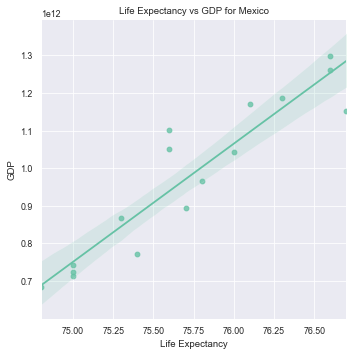

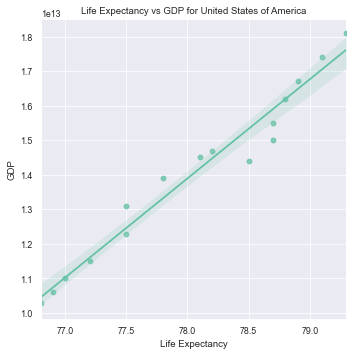

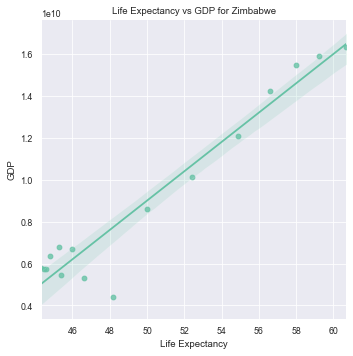

In [91]:
countries = df.country.unique()
for country in countries:
    reg_by_country(df,country)
